In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import cmdstanpy
import os

cmdstanpy.utils.cxx_toolchain_path()


INFO:cmdstanpy:Add C++ toolchain to $PATH: C:\Users\Me\.cmdstanpy\RTools40


('C:\\Users\\Me\\.cmdstanpy\\RTools40\\mingw64\\bin',
 'C:\\Users\\Me\\.cmdstanpy\\RTools40\\usr\\bin')

# Generate Claims
 Simple generator of lognormal claims

<AxesSubplot:>

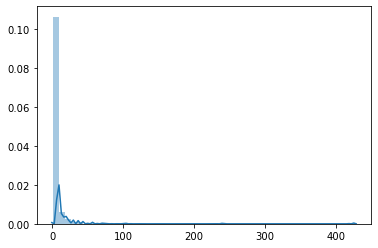

In [2]:
# parameters
mu = 0.5
sigma = 1

dist = stats.lognorm(np.exp(mu), sigma)

# generate claims
claims = dist.rvs(size=1000)

# graph
sns.distplot(claims)


 \begin{aligned}
 X_i & \sim LN(mu, sigma) \\
 mu & \sim N( \mu_{mu}, 1 ) \\
 sigma & \sim exp( \lambda_{sigma} ) \\
 \mu_{mu} & = 1 \\
 \lambda_{sigma} & = 1 \\
 \end{aligned}
 model

In [3]:
print(os.getcwd())


c:\Users\Me\projects\claims_models


In [4]:
# priors

# prior predictive checks

mu_mu = 0.5
lambda_sigma = 1

samples = 100

prior_scale = stats.norm(mu_mu, 1).rvs(size=samples) # note stats.expon using scale notation so scale = 1 / lambda
prior_shape = stats.expon(1 / lambda_sigma).rvs(size=samples)


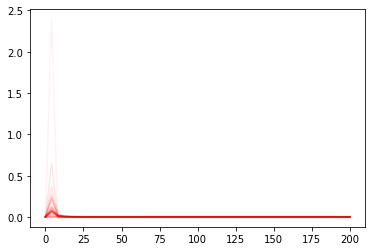

In [5]:
fig, ax = plt.subplots(1,1)

x = np.linspace(0, 200)

for sample in range(samples):

    prior_dist = stats.lognorm(prior_scale[sample], prior_shape[sample])
    ax.plot(x, prior_dist.pdf(x), 'r-', alpha=0.05)



In [6]:
# Build Model

file_path = os.path.join(os.getcwd(), 'model_1.stan')

model = cmdstanpy.CmdStanModel(stan_file=file_path)
model.name
model.stan_file
model.exe_file
print(model.code())



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: c:/Users/Me/projects/claims_models/model_1.exe
data {
  int<lower=0> N;
  vector[N] claims;
    // real mu_mu;
    // real<lower=0> lambda_sigma;
}
parameters {
  real mu;
  real<lower=0> sigma;
}
model {
    mu ~ normal(1, 1);
    sigma ~ exponential(1);
    claims ~ lognormal(mu, sigma);
}


In [7]:
# Sample
stan_data = {
    'N': claims.shape[0],
    'claims': claims.tolist()
}

fit = model.sample(data=stan_data) #, output_dir='./model_output')

print(fit)

print(fit.sample.shape)

print(fit.summary())

print(fit.diagnose())

# diagnostics
# validations

# single dist
# add cat
# add variate
# add time


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


RuntimeError: Error during sampling.
chain 1 returned error code 3221225781
chain 2 returned error code 3221225781
chain 3 returned error code 3221225781
chain 4 returned error code 3221225781
